In [4]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
got_dataset = pd.read_csv("../input/game-of-thrones/character-predictions.csv");

In [8]:
# show all the table
pd.set_option('display.max_columns', None)
got_dataset.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [9]:
got_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [16]:
# get the number of null values by column
nans = got_dataset.isna().sum()
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [17]:
#describe dataset
got_dataset.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
print(got_dataset["age"].mean()) # age negative

-1293.5635103926097


In [22]:
print(got_dataset["name"][got_dataset["age"] < 0])
print(got_dataset["age"][got_dataset["age"] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [23]:
# chage the age invalids
got_dataset.loc[1684, "age"] = 25.0
got_dataset.loc[1868, "age"] = 0.0

In [24]:
print(got_dataset["age"].mean())

36.70438799076212


# Treat null data

In [25]:
# work with data null
got_dataset["age"].fillna(got_dataset["age"].mean(), inplace=True) # change the null value in age by the mean of column
got_dataset["culture"].fillna("", inplace=True) # change the null value in culture column by empty string

# fill the rest of null values with -1 value
got_dataset.fillna(value=-1, inplace=True)

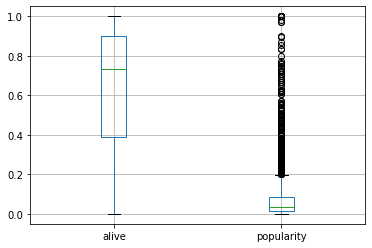

In [27]:
# there are many possible outlies in popularity column according to boxplot
got_dataset.boxplot(['alive', 'popularity'])

In [28]:
# took out some column
drop = ["S.No", "pred", "alive", "plod", "isAlive", "DateoFdeath"]
got_dataset.drop(drop, inplace=True, axis=1)

In [ ]:
got_dataset.head

# Work with categorical data

In [29]:
# transform the data categorical in on hot encode
got_dataset = pd.get_dummies(got_dataset)

In [32]:
got_dataset.head()

actual  male  dateOfBirth  book1  book2  book3  book4  book5  \
0       0     1         -1.0      0      0      0      0      0   
1       1     1        208.0      1      1      1      1      1   
2       1     1         -1.0      0      0      0      1      0   
3       0     0         82.0      0      0      0      0      0   
4       1     0        276.0      0      0      0      1      0   

   isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  \
0            1.0            0.0          0.0           -1.0          0   
1           -1.0           -1.0         -1.0            1.0          1   
2           -1.0           -1.0         -1.0           -1.0          0   
3           -1.0           -1.0         -1.0            0.0          1   
4           -1.0           -1.0         -1.0            1.0          1   

   isNoble        age  numDeadRelations  boolDeadRelations  isPopular  \
0        0  36.704388                11                  1          1   
1        1  97.000000                 1                  1          1   
2        1  36.704388                 0                  0          0   
3        1  23.000000                 0                  0          0   
4        1  29.000000                 0                  0          0   

   popularity  name_Abelar Hightower  name_Addam  name_Addam Frey  \
0    0.605351                      0           0                0   
1    0.896321                      0           0                0   
2    0.267559                      0           0                0   
3    0.183946                      0           0                0   
4    0.043478                      0           0                0   

   name_Addam Marbrand  name_Addam Osgrey  name_Addam Velaryon  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    0                  0                    0   
3                    0                  0                    0   
4                    0                  0                    0   

   name_Addison Hill  name_Aegon Blackfyre  name_Aegon Frey (son of Aenys)  \
0                  0                     0                               0   
1                  0                     0                               0   
2                  1                     0                               0   
3                  0                     0                               0   
4                  0                     0                               0   

   name_Aegon Frey (son of Stevron)  name_Aegon I Targaryen  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

   name_Aegon II Targaryen  name_Aegon III Targaryen  name_Aegon IV Targaryen  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0                         0                        0   
4                        0                         0                        0   

   name_Aegon Targaryen (son of Aenys I)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   name_Aegon Targaryen (son of Baelon)  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   name_Aegon Targaryen (son of Jaehaerys I) 

In [38]:
# separate the prediction values and the answer
x = got_dataset.iloc[:, 1:]
y = got_dataset.iloc[:, 0]

# Start algotithm pipeline

In [33]:
# separate the data for application of model using crossover validation
# divide the dataset between 5 groups
Kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
print(Kfold.get_n_splits())

5


In [36]:
models = [LogisticRegression(solver="liblinear"), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), SVC(kernel="linear", gamma="scale", random_state=42), KNeighborsClassifier()]

In [41]:
# using crossover validation
mean = []
std = []

for model in models:
    result = cross_val_score(model, x, y, cv=Kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

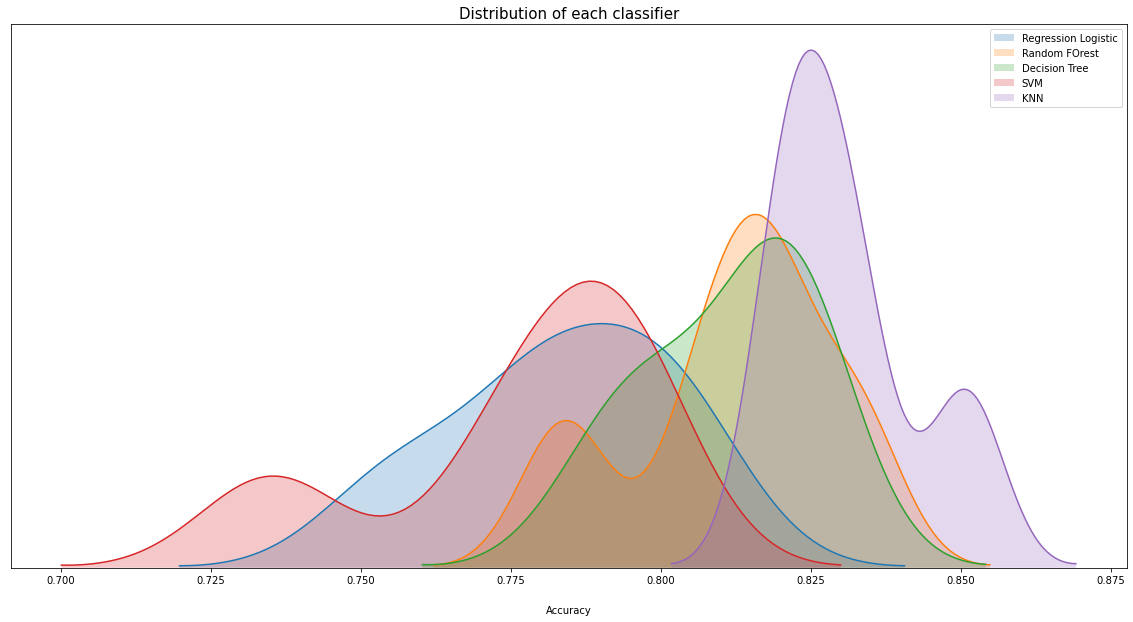

In [46]:
classifiers = ['Regression Logistic', 'Random FOrest', "Decision Tree", "SVM", "KNN"]

plt.figure(figsize=(20, 10))

for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade": True})
    
plt.title("Distribution of each classifier", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Accuracy", labelpad=20)
plt.yticks([])

plt.show()

# Predict model

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [49]:
#choose svm and random forest algorithm
svm_clf = SVC(C=0.9, gamma=0.1, kernel="linear", probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

# training the model
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
# get the probability predicted
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# true values
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

In [52]:
# analyse the models
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm.sum(axis=1)[:, np.newaxis]

classes = ["Death", "Alive"]
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("SVM", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Prevision", ylabel="Value Real")

ax[0].set_title("Random Forest", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Prevision", ylabel="Value Real")

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''